## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
df = pd.read_csv(r"C:\Users\a534749\Desktop\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data

#observe the different feature type present in the data
df.info()

print("\n--- Statistical Summary ---")
df.describe()

print(f"\nShape of the data: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

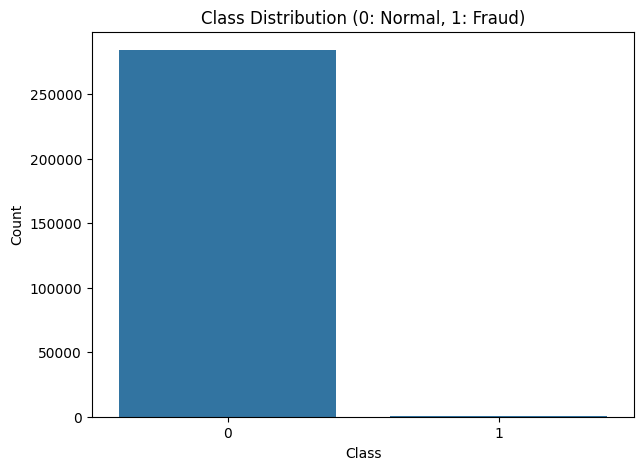

Percentage of Normal Transactions: 99.8273%
Percentage of Fraud Transactions: 0.1727%


In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print(f"Percentage of Normal Transactions: {normal_share:.4f}%")
print(f"Percentage of Fraud Transactions: {fraud_share:.4f}%")

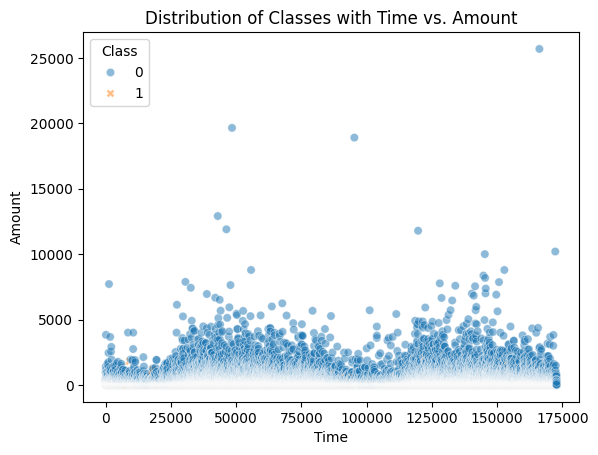

In [8]:
# Create a scatter plot to observe the distribution of classes with time
# Create a scatter plot to observe the distribution of classes with time
# We'll plot Time vs. Amount, colored by Class
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.5, style='Class')
plt.title('Distribution of Classes with Time vs. Amount')
plt.show()

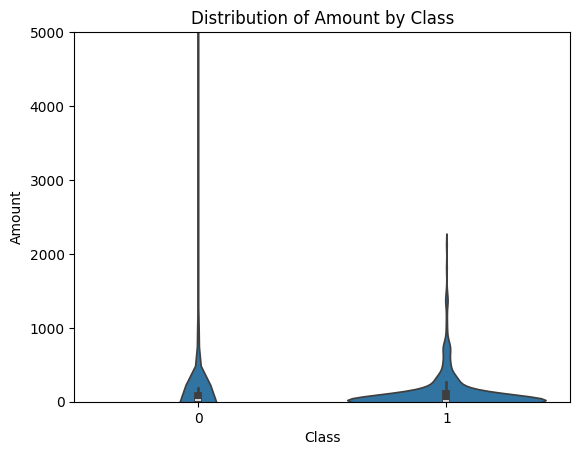

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount 
# Create a scatter plot to observe the distribution of classes with Amount
# A violin plot is more effective here to see distributions
sns.violinplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Amount by Class')
# Limit y-axis for better visibility as Amount has extreme outliers
plt.ylim(0, 5000) 
plt.show()

In [10]:
# Drop unnecessary columns 
# Drop unnecessary columns
# 'Time' is just an elapsed counter and may not be a generalizable feature
df = df.drop('Time', axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [11]:
y = df['Class']
X = df.drop('Class', axis=1)

In [13]:
from sklearn import model_selection

# Split the data, using stratify=y to ensure both train and test sets
# have a similar proportion of fraud cases.
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

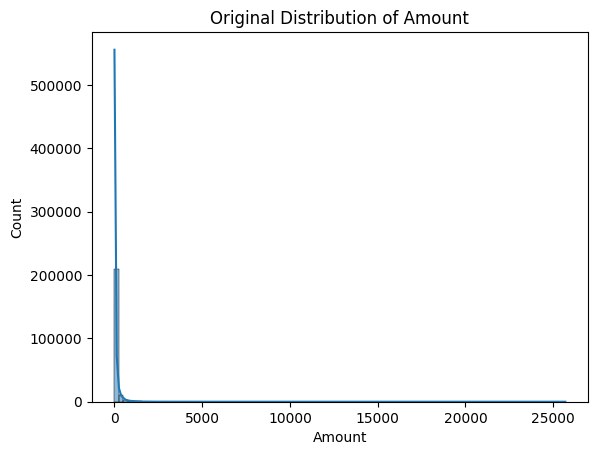

In [15]:
# plot the histogram of a variable from the dataset to see the skewness 
# plot the histogram of a variable from the dataset to see the skewness
# 'Amount' is the most likely candidate for skewness
sns.histplot(X_train['Amount'], bins=100, kde=True)
plt.title('Original Distribution of Amount')
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data 
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# We will apply this to all columns to make them more Gaussian.
# We use copy=True (default) for safer operation.

# Get column names to re-assign after transforming
cols = X_train.columns

pt = preprocessing.PowerTransformer(copy=True)

X_train = pd.DataFrame(pt.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(pt.transform(X_test), columns=cols)

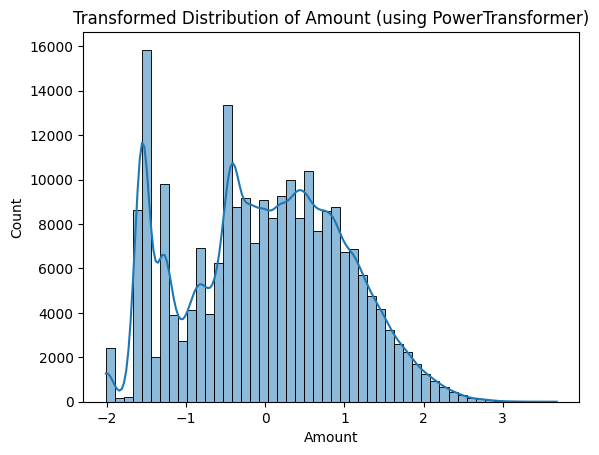

In [18]:
# plot the histogram of a variable from the dataset again to see the result  
# plot the histogram of a variable from the dataset again to see the result
# Plot 'Amount' again
sns.histplot(X_train['Amount'], bins=50, kde=True)
plt.title('Transformed Distribution of Amount (using PowerTransformer)')
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [19]:
from sklearn import linear_model #import the package

num_C = [0.01, 0.1, 1, 10, 100]  #--> list of values
cv_num = 5

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# We use RandomForest to match the feature_importance cell later
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameters (small grid for speed)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
}
cv_num = 3 # Use 3-fold CV for speed

#perform hyperparameter tuning using cross validation
# We use 'average_precision' (PR AUC) as it's better for imbalance
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=param_grid, 
                       cv=cv_num, 
                       scoring='average_precision', 
                       n_jobs=-1)

print("Starting Grid Search for Imbalanced Random Forest...")
grid_rf.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print(f"\nBest Average Precision (PR AUC): {grid_rf.best_score_}")

#print the optimum value of hyperparameters
print(f"Best Hyperparameters: {grid_rf.best_params_}")

Starting Grid Search for Imbalanced Random Forest...

Best Average Precision (PR AUC): 0.8174743829451631
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [21]:
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score

clf = grid_rf.best_estimator_  #initialise the model with optimum hyperparameters
# clf.fit(X_train, y_train) # No need to fit, grid.best_estimator_ is already fitted

# Predict on X_test
y_pred_rf = clf.predict(X_test)
y_pred_proba_rf = clf.predict_proba(X_test)[:, 1]

#print the evaluation score on the X_test
print("--- Test Set Evaluation (Imbalanced Random Forest) ---")
print(classification_report(y_test, y_pred_rf))
print(f"Test PR AUC (Average Precision): {average_precision_score(y_test, y_pred_proba_rf)}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf)}")

--- Test Set Evaluation (Imbalanced Random Forest) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Test PR AUC (Average Precision): 0.8118186114740658
Test ROC AUC: 0.9801208468756102


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 10
2nd Top var = 4
3rd Top var = 14


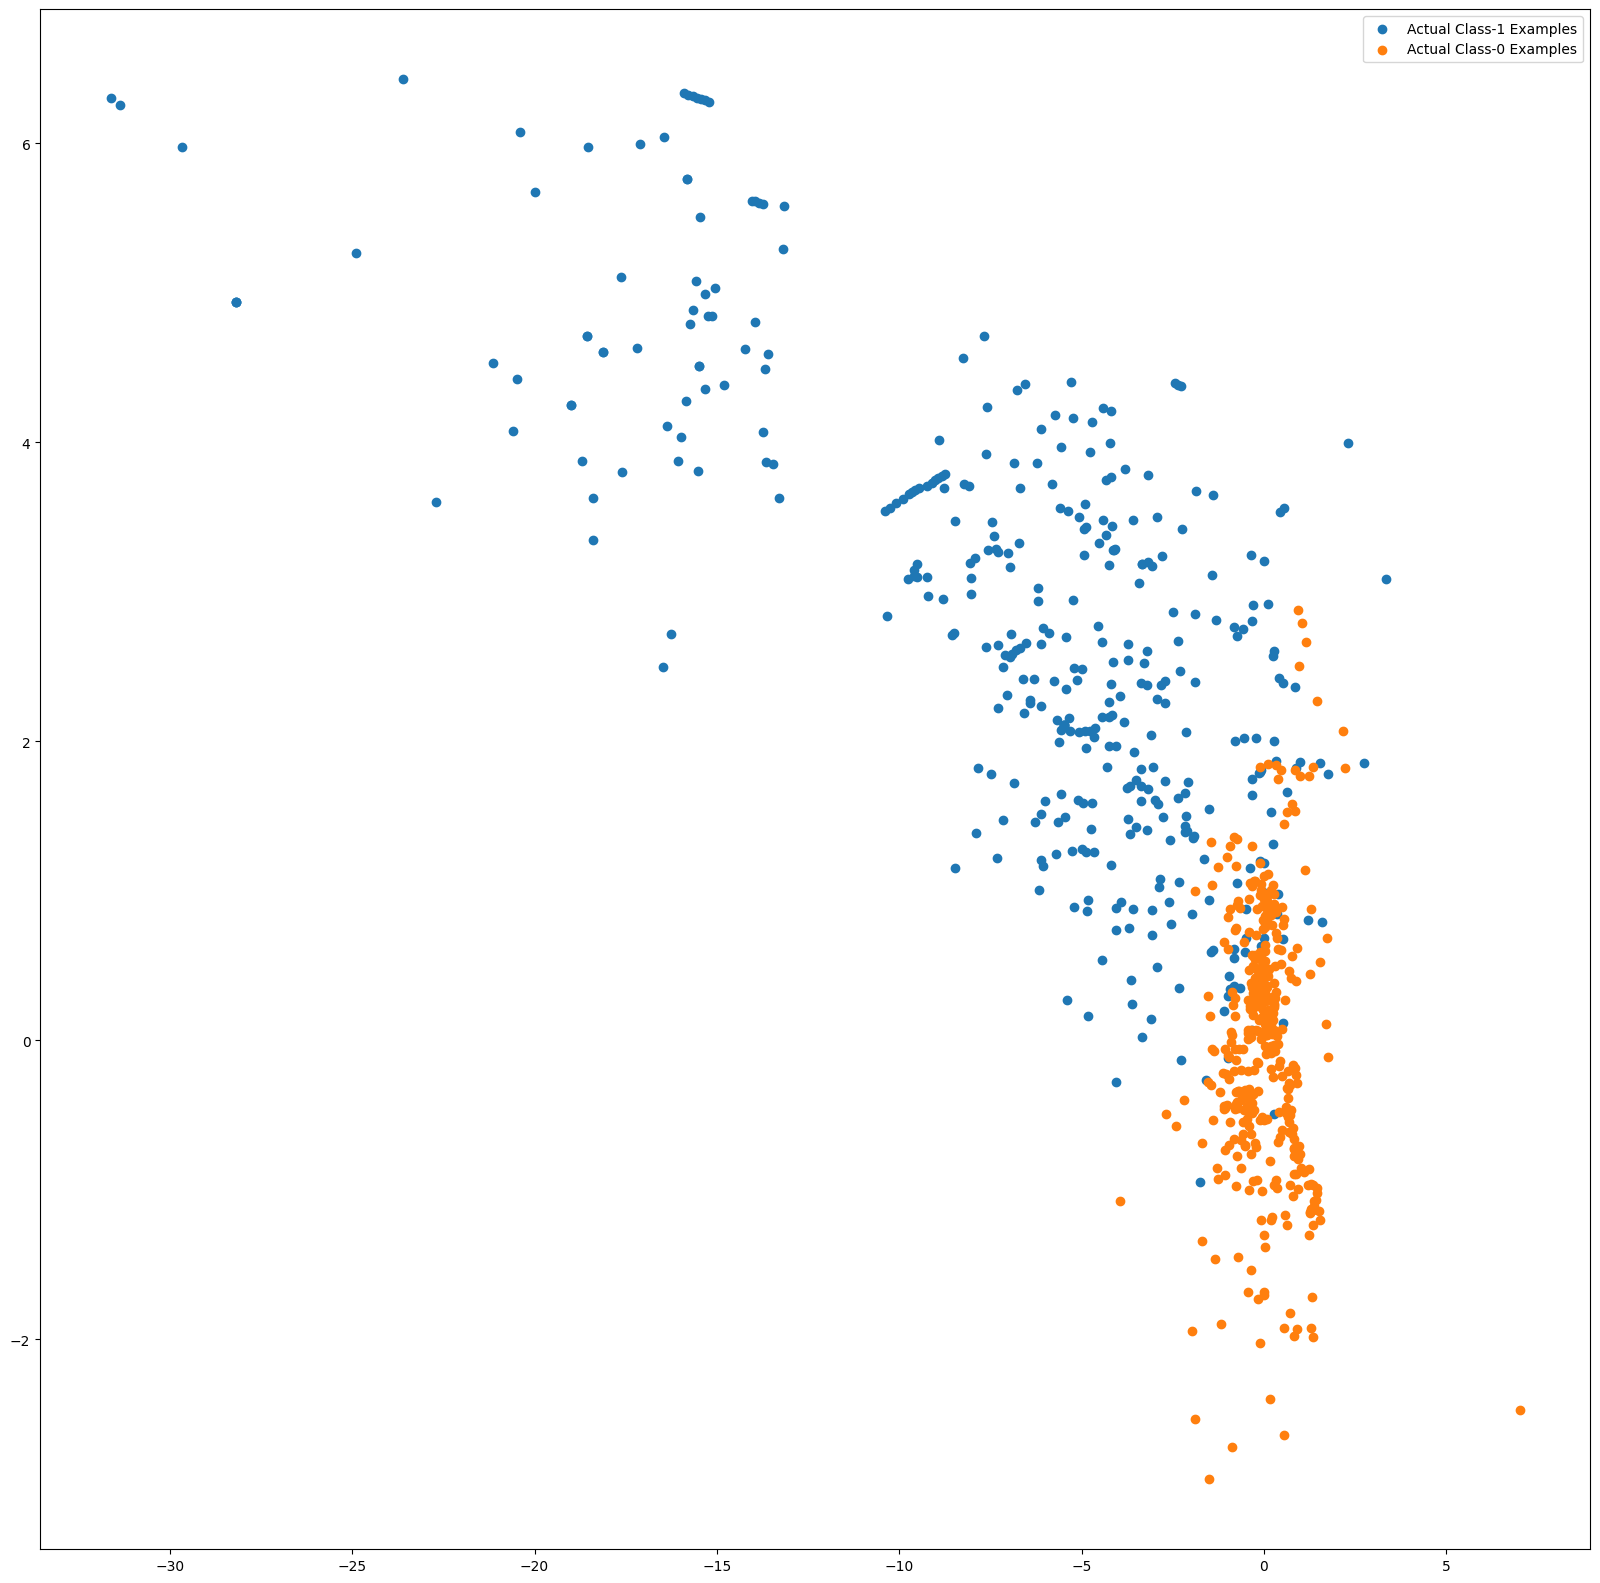

In [22]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [23]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.01, 0.1, 1, 10]  #--> list of values (reduced for speed)
cv_num = 5   #--> list of values

# We will use this LR model in the pipelines below
lr = linear_model.LogisticRegression(solver='liblinear')

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [34]:
from imblearn import over_sampling #- import the packages
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

# 1. Create the oversampler
ros = over_sampling.RandomOverSampler(random_state=42)

# 2. Create an imblearn pipeline
pipeline_ros = ImbPipeline([
    ('sampler', ros),
    ('model', lr) # 'lr' defined in Cell 33
])

# 3. Define hyperparameter grid (note the 'model__' prefix)
param_grid_ros = {
    'model__C': num_C
}

# 4. Perform hyperparameter tuning
grid_ros = GridSearchCV(estimator=pipeline_ros,
                        param_grid=param_grid_ros,
                        cv=cv_num,
                        scoring='average_precision',
                        n_jobs=-1)

print("Starting Grid Search with RandomOversampling...")
grid_ros.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print(f"\nBest PR AUC (ROS): {grid_ros.best_score_}")

#print the optimum value of hyperparameters
print(f"Best Hyperparameters (ROS): {grid_ros.best_params_}")


Starting Grid Search with RandomOversampling...

Best PR AUC (ROS): 0.7635899305853187
Best Hyperparameters (ROS): {'model__C': 0.01}


In [33]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

InvalidIndexError: (slice(None, 394, None), 0)

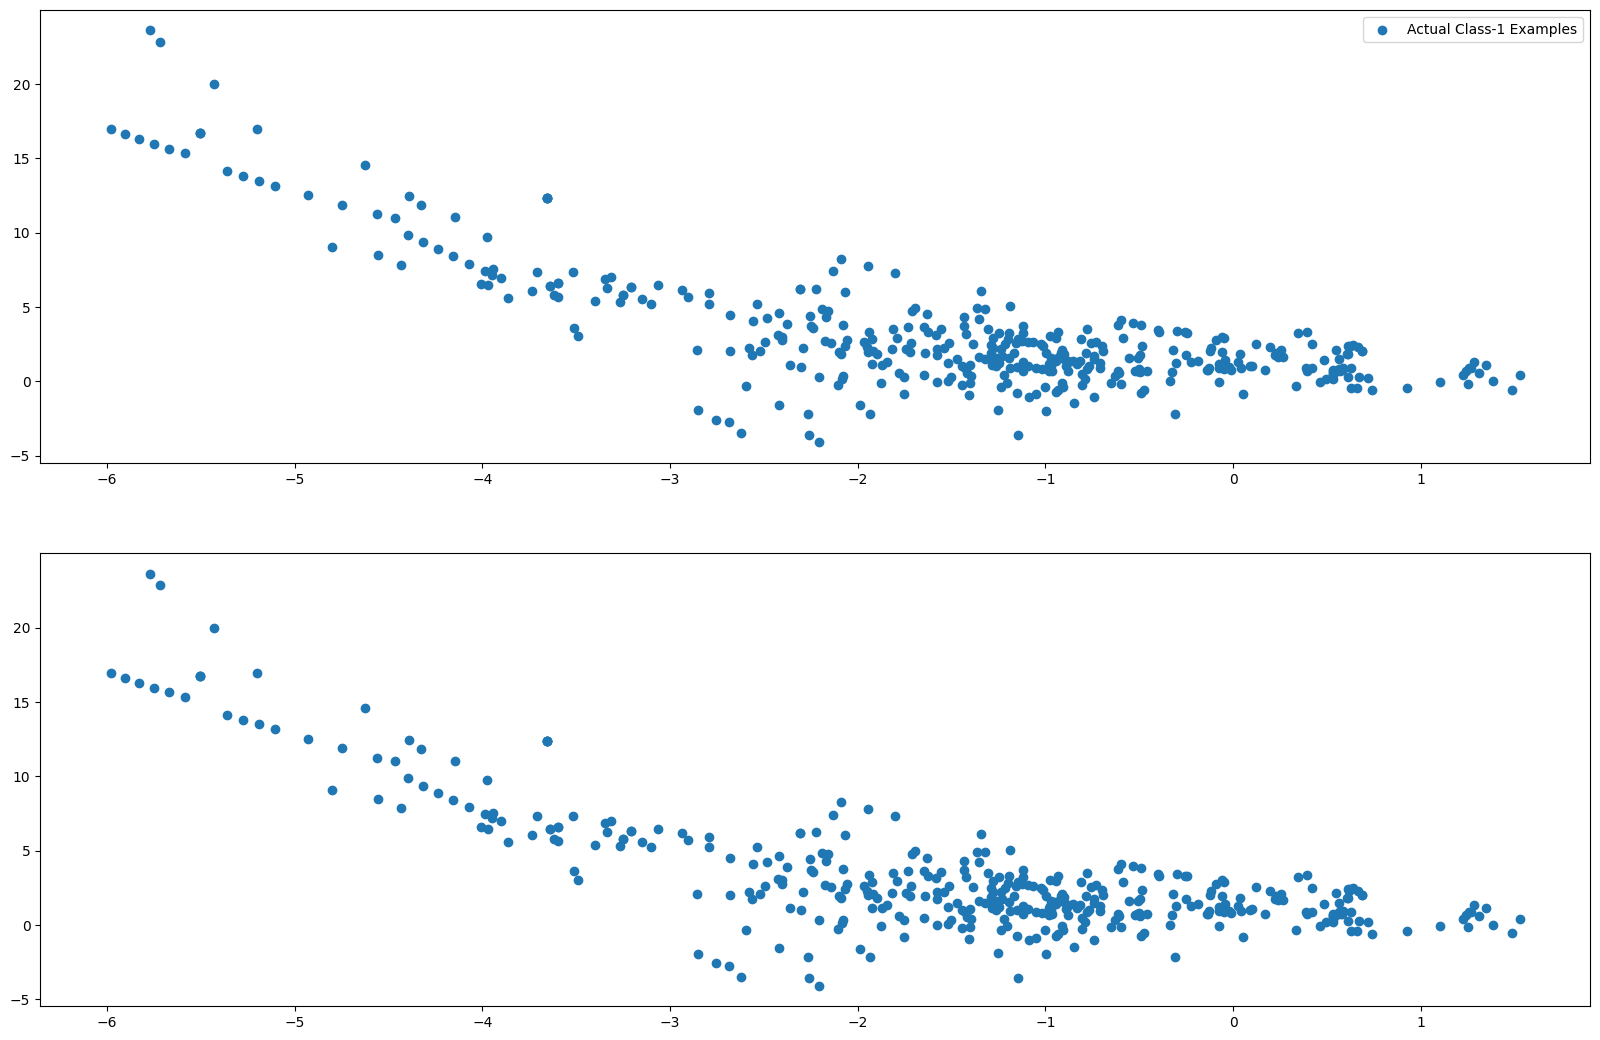

In [35]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [36]:
from imblearn.over_sampling import SMOTE

#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

# 1. Create the oversampler
smote = SMOTE(random_state=42)

# 2. Create an imblearn pipeline
pipeline_smote = ImbPipeline([
    ('sampler', smote),
    ('model', lr) # 'lr' defined in Cell 33
])

# 3. Define hyperparameter grid
param_grid_smote = {
    'model__C': num_C
}

# 4. Perform hyperparameter tuning
grid_smote = GridSearchCV(estimator=pipeline_smote,
                          param_grid=param_grid_smote,
                          cv=cv_num,
                          scoring='average_precision',
                          n_jobs=-1)

print("Starting Grid Search with SMOTE...")
grid_smote.fit(X_train, y_train)

#print the evaluation result
print(f"\nBest PR AUC (SMOTE): {grid_smote.best_score_}")

#print the optimum value of hyperparameters
print(f"Best Hyperparameters (SMOTE): {grid_smote.best_params_}")

Starting Grid Search with SMOTE...

Best PR AUC (SMOTE): 0.7600577090598005
Best Hyperparameters (SMOTE): {'model__C': 0.01}


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

InvalidIndexError: (slice(None, 394, None), 0)

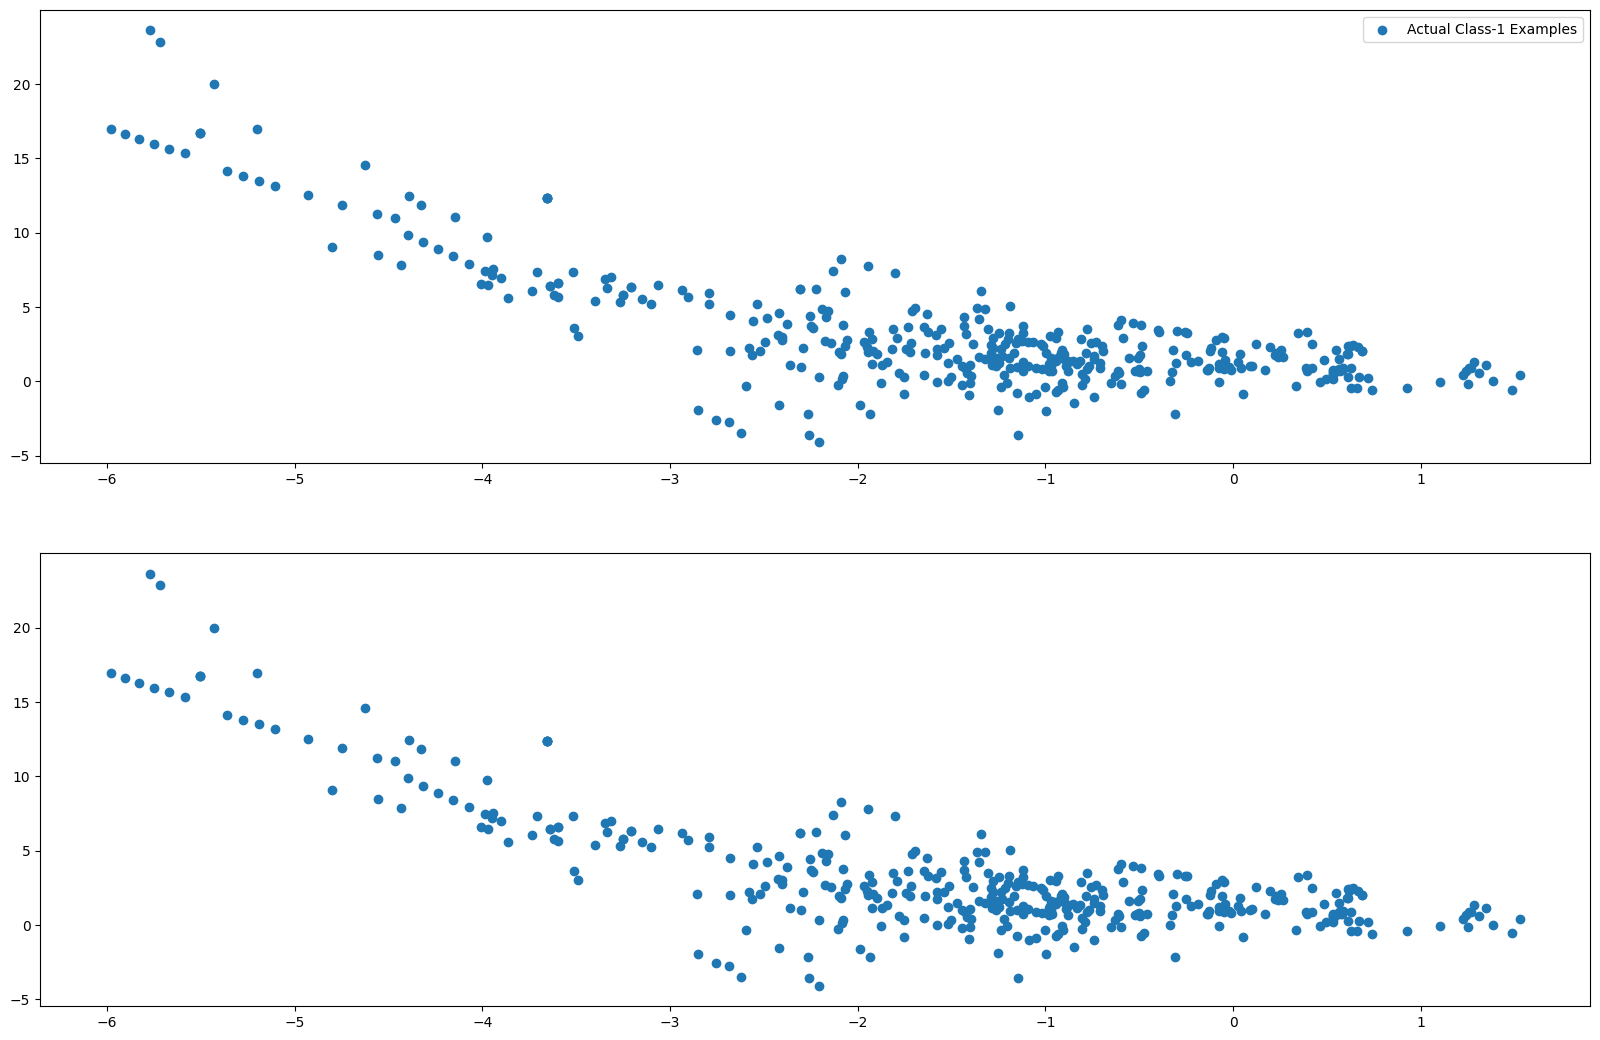

In [37]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [38]:
from imblearn.over_sampling import ADASYN

#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

# 1. Create the oversampler
adasyn = ADASYN(random_state=42)

# 2. Create an imblearn pipeline
pipeline_adasyn = ImbPipeline([
    ('sampler', adasyn),
    ('model', lr) # 'lr' defined in Cell 33
])

# 3. Define hyperparameter grid
param_grid_adasyn = {
    'model__C': num_C
}

# 4. Perform hyperparameter tuning
grid_adasyn = GridSearchCV(estimator=pipeline_adasyn,
                           param_grid=param_grid_adasyn,
                           cv=cv_num,
                           scoring='average_precision',
                           n_jobs=-1)

print("Starting Grid Search with ADASYN...")
grid_adasyn.fit(X_train, y_train)

#print the evaluation result
print(f"\nBest PR AUC (ADASYN): {grid_adasyn.best_score_}")

#print the optimum value of hyperparameters
print(f"Best Hyperparameters (ADASYN): {grid_adasyn.best_params_}")


Starting Grid Search with ADASYN...

Best PR AUC (ADASYN): 0.7448129465071318
Best Hyperparameters (ADASYN): {'model__C': 0.1}


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [39]:
# Compare the best scores from the 3 samplers
best_score = 0
best_estimator = None
best_name = ""

samplers = {
    'RandomOversampling': grid_ros,
    'SMOTE': grid_smote,
    'ADASYN': grid_adasyn
}

for name, grid in samplers.items():
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_estimator = grid.best_estimator_
        best_name = f"Logistic Regression with {name}"

print(f"The best model is: {best_name} (Validation PR AUC: {best_score:.4f})")

# perform the best oversampling method on X_train & y_train
# The best_estimator_ is already the final pipeline, fitted on the full X_train

clf = best_estimator  #initialise the model with optimum hyperparameters
# clf.fit( ) # Not needed, already fitted by GridSearchCV

# Predict on the test dataset
y_pred_balanced = clf.predict(X_test)
y_pred_proba_balanced = clf.predict_proba(X_test)[:, 1]

#print() --> #print the evaluation score on the X_test
print(f"\n--- Test Set Evaluation ({best_name}) ---")
print(classification_report(y_test, y_pred_balanced))
print(f"Test PR AUC (Average Precision): {average_precision_score(y_test, y_pred_proba_balanced)}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_balanced)}")

The best model is: Logistic Regression with RandomOversampling (Validation PR AUC: 0.7636)

--- Test Set Evaluation (Logistic Regression with RandomOversampling) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Test PR AUC (Average Precision): 0.7205384674629624
Test ROC AUC: 0.9735854721038669


### Print the important features of the best model to understand the dataset

In [40]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

Using np.abs(coef_[0]) from Logistic Regression
Top var = V4 (Index 3)
2nd Top var = V14 (Index 13)
3rd Top var = V10 (Index 9)

Plotting V4 vs V14 (Original Data)


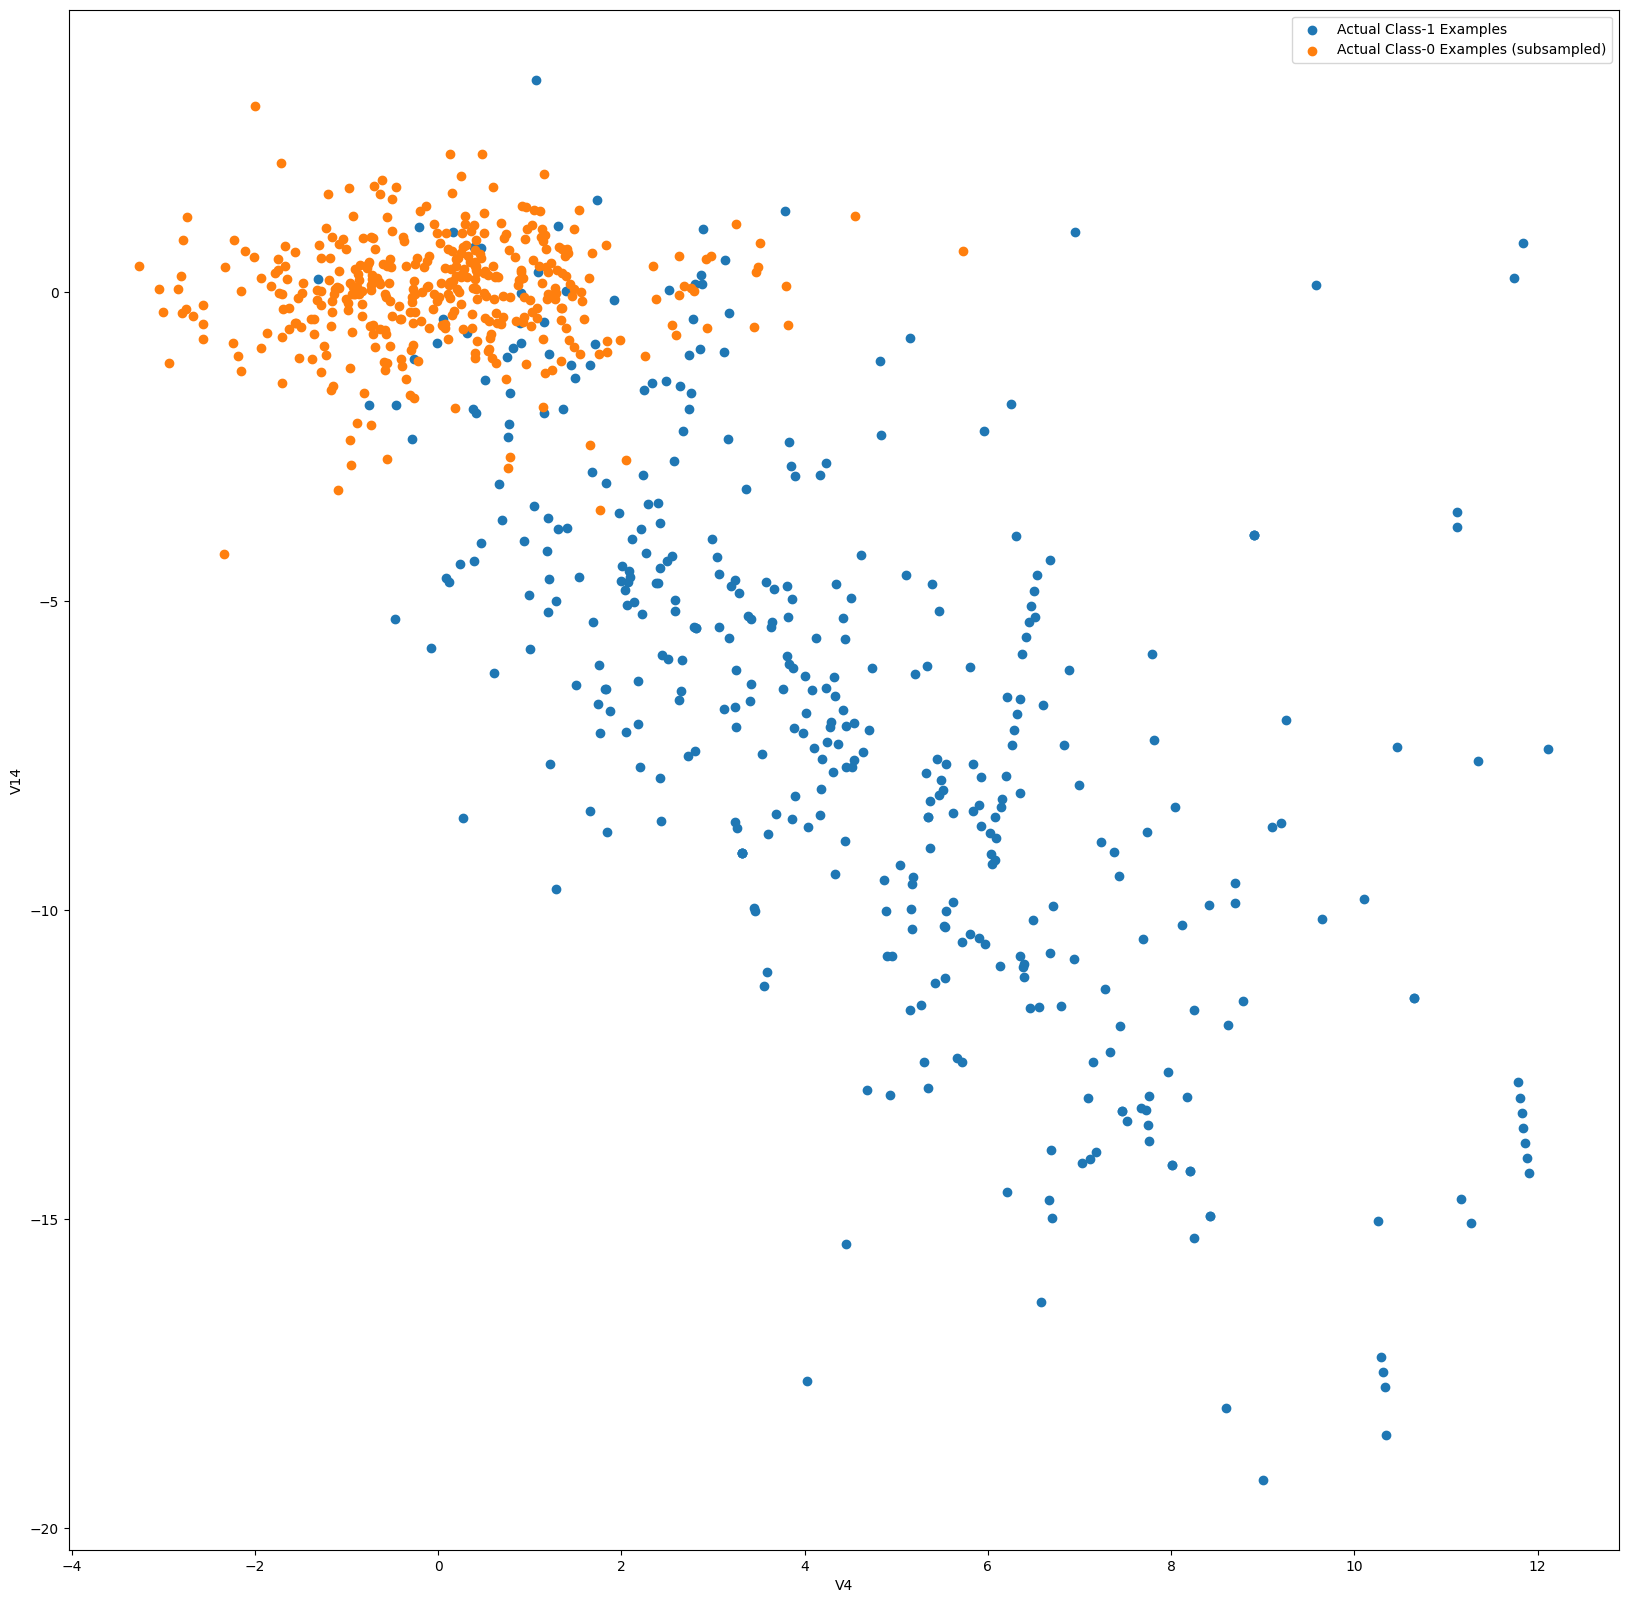

In [41]:
#### Print the FPR,TPR & select the best threshold from the roc curve 
# This cell was for .feature_importances_ (Trees)
# We will adapt it for .coef_ (Logistic Regression) from our pipeline

# 1. Get the model from the pipeline
model_step = clf.steps[-1][1] 

# 2. Get the coefficients
if hasattr(model_step, 'coef_'):
    # Coefs are (1, n_features), we take abs value of the 1st row
    importances = np.abs(model_step.coef_[0])
    print("Using np.abs(coef_[0]) from Logistic Regression")
else:
    print("Best model does not have .coef_ attribute.")
    importances = np.zeros(X_train.shape[1]) # dummy

if not np.all(importances == 0):
    var_imp = list(importances)
    
    # Get indices of sorted importances (descending)
    sorted_indices = np.argsort(importances)[::-1]

    print(f'Top var = {X_train.columns[sorted_indices[0]]} (Index {sorted_indices[0]})')
    print(f'2nd Top var = {X_train.columns[sorted_indices[1]]} (Index {sorted_indices[1]})')
    print(f'3rd Top var = {X_train.columns[sorted_indices[2]]} (Index {sorted_indices[2]})')

    top_var_index = sorted_indices[0]
    second_top_var_index = sorted_indices[1]
    
    # We plot using the *original* (un-transformed) data for interpretability
    # We must re-load and re-split to get the original values
    df_orig = pd.read_csv('creditcard.csv').drop('Time', axis=1)
    X_orig = df_orig.drop('Class', axis=1)
    y_orig = df_orig['Class']
    X_train_orig, _, y_train_orig, _ = model_selection.train_test_split(X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig)

    X_train_1 = X_train_orig[y_train_orig==1].to_numpy()
    X_train_0 = X_train_orig[y_train_orig==0].to_numpy()

    np.random.shuffle(X_train_0)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [20, 20]
    
    # Get column names by index
    top_col_name = X_train_orig.columns[top_var_index]
    second_top_col_name = X_train_orig.columns[second_top_var_index]
    
    print(f"\nPlotting {top_col_name} vs {second_top_col_name} (Original Data)")

    plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
                label='Actual Class-0 Examples (subsampled)')
    plt.xlabel(top_col_name)
    plt.ylabel(second_top_col_name)
    plt.legend()
    plt.show()

Test auc = 0.9735854721038669
Best Threshold (based on max TPR-FPR): 0.557694


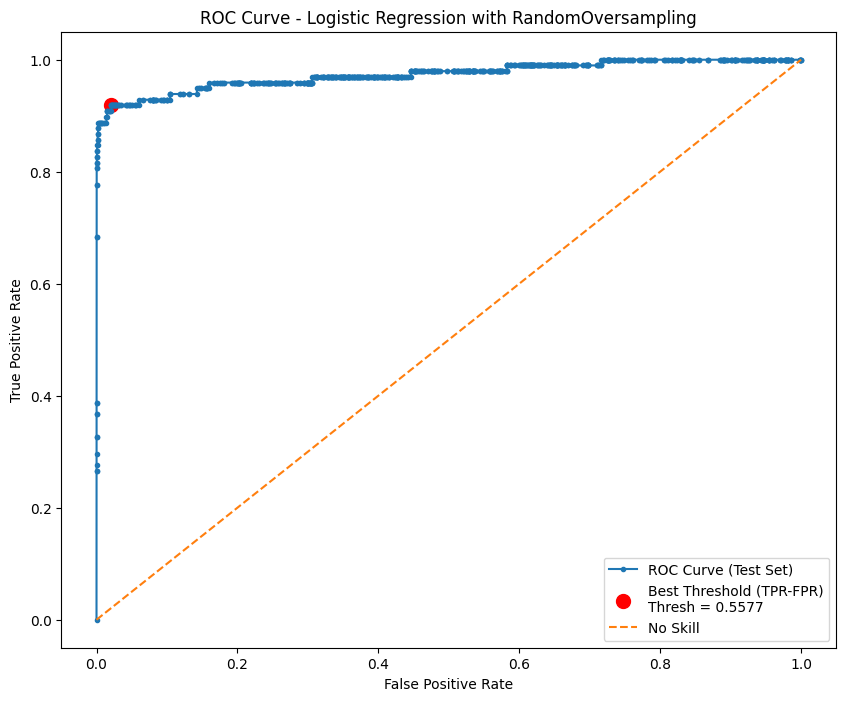

In [42]:
# Use the probabilities from the best balanced model on the test set
y_probs = y_pred_proba_balanced 

print('Test auc =', metrics.roc_auc_score(y_test, y_probs))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)

# Find the threshold that gives the best Youden's J statistic (tpr - fpr)
J = tpr - fpr
ix = np.argmax(J)
threshold = thresholds[ix]
print(f"Best Threshold (based on max TPR-FPR): {threshold:.6f}")

# Plot the ROC curve
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(fpr, tpr, marker='.', label='ROC Curve (Test Set)')
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='red', 
            label=f'Best Threshold (TPR-FPR)\nThresh = {threshold:.4f}')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title(f'ROC Curve - {best_name}')
plt.show()